In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')
import seaborn as sns

# Testing

In [2]:
production=pd.read_csv('production3/100_m_production.csv')
production["Unnamed: 0"]=pd.read_csv('data/greedy_500_v.csv')["Unnamed: 0"].values[3:]
production=production.rename(columns={'Unnamed: 0': "date"})
production=production.set_index("date")
production.index=pd.to_datetime(production.index, utc=True)
production.index=production.index.tz_convert("Europe/Rome")
production=production.resample('1h').mean()
production

greedy_m
date                                  
2013-01-01 08:00:00+01:00   868.628021
2013-01-01 09:00:00+01:00   988.799834
2013-01-01 10:00:00+01:00  1088.469258
2013-01-01 11:00:00+01:00  1376.040402
2013-01-01 12:00:00+01:00  1983.529358
...                                ...
2013-12-31 12:00:00+01:00  2247.461108
2013-12-31 13:00:00+01:00  2113.244352
2013-12-31 14:00:00+01:00  1234.631453
2013-12-31 15:00:00+01:00  1107.980359
2013-12-31 16:00:00+01:00   957.576572

[8745 rows x 1 columns]

In [3]:
x=production.index
y=production.greedy_m.rolling('7d').mean()

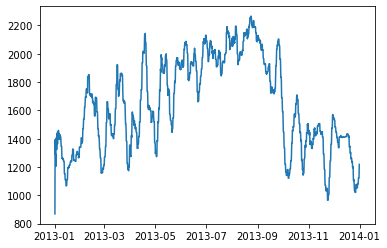

In [4]:
plt.plot(x,y)

In [5]:
y

date
2013-01-01 08:00:00+01:00     868.628021
2013-01-01 09:00:00+01:00     928.713927
2013-01-01 10:00:00+01:00     981.965704
2013-01-01 11:00:00+01:00    1080.484379
2013-01-01 12:00:00+01:00    1261.093375
                                ...     
2013-12-31 12:00:00+01:00    1177.993483
2013-12-31 13:00:00+01:00    1199.806366
2013-12-31 14:00:00+01:00    1208.379188
2013-12-31 15:00:00+01:00    1214.273918
2013-12-31 16:00:00+01:00    1218.364751
Freq: H, Name: greedy_m, Length: 8745, dtype: float64

In [6]:
production2=pd.read_csv('production4/100_m_production.csv')
production2["Unnamed: 0"]=pd.read_csv('data/greedy_500_v.csv')["Unnamed: 0"].values[3:]
production2=production2.rename(columns={'Unnamed: 0': "date"})
production2=production2.set_index("date")
production2.index=pd.to_datetime(production2.index, utc=True)
production2.index=production2.index.tz_convert("Europe/Rome")
production2=production2.resample('1h').mean()
production2

greedy_m
date                                  
2013-01-01 08:00:00+01:00  2018.728075
2013-01-01 09:00:00+01:00  2335.709134
2013-01-01 10:00:00+01:00  2678.029940
2013-01-01 11:00:00+01:00  3230.185141
2013-01-01 12:00:00+01:00  4234.882457
...                                ...
2013-12-31 12:00:00+01:00  4712.494320
2013-12-31 13:00:00+01:00  4480.054857
2013-12-31 14:00:00+01:00  3743.431588
2013-12-31 15:00:00+01:00  2716.974360
2013-12-31 16:00:00+01:00  2244.539446

[8745 rows x 1 columns]

In [7]:
x2=production2.index
y2=production2.greedy_m.rolling('7d').mean()

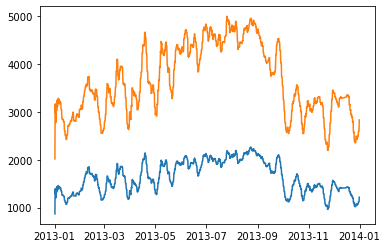

In [8]:

ax=plt.plot(x,y)
ax=plt.plot(x2,y2)

# Plotting

## Production vs Consumption

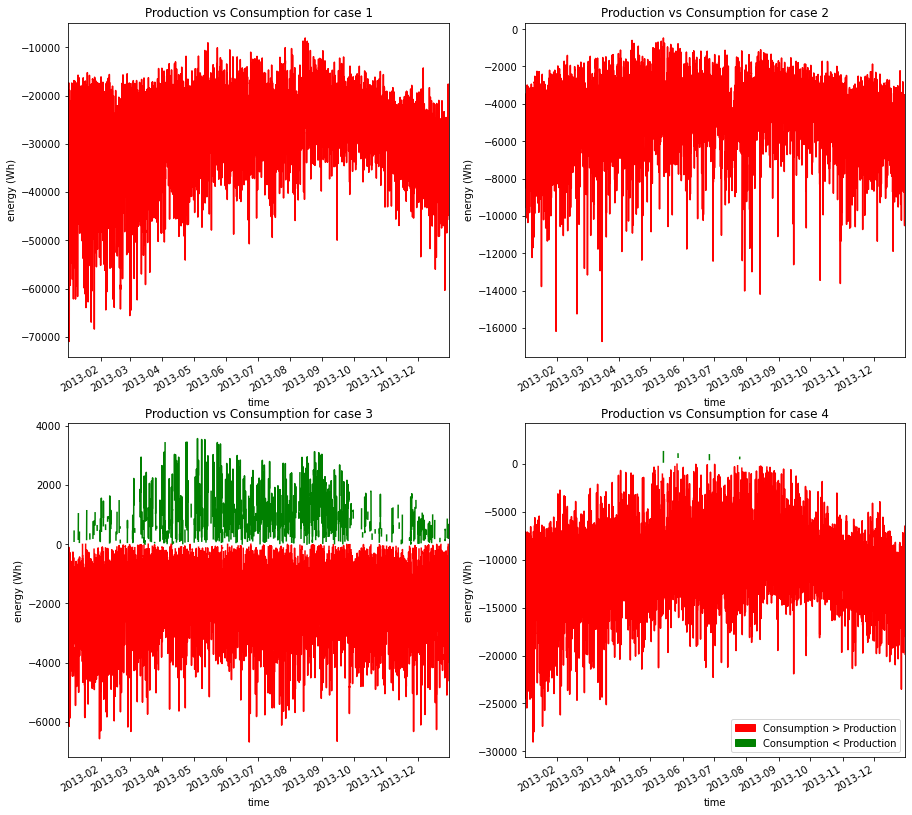

In [70]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
for c in range(1,5):
    ned=pd.read_csv('data{}/simulatedHouses.csv'.format(c))
    ned.t=pd.to_datetime(ned.t, utc=True)
    ned=ned.set_index('t')
    ned.index=ned.index.tz_convert("Europe/Rome")
    production=pd.read_csv('production{}/100_m_production.csv'.format(c))
    production["Unnamed: 0"]=pd.read_csv('data/greedy_500_v.csv')["Unnamed: 0"].values[3:]
    production=production.rename(columns={'Unnamed: 0': "date"})
    production=production.set_index("date")
    production.index=pd.to_datetime(production.index, utc=True)
    production.index=production.index.tz_convert("Europe/Rome")
    production=production.resample('1h').mean()
    merged=ned.join(production)
    merged.greedy_m=merged.greedy_m.fillna(0)
    merged.difference=merged.greedy_m-merged.P
    up=merged.difference.where(merged.difference.ge(0), np.nan).plot(kind='line',ax=ax[(c-1)//2,(c-1)%2],
                                                                  color='green',
                                                                  title='Production vs Consumption for case {}'.format(c))
    down=merged.difference.where(merged.difference.le(0), np.nan).plot(kind='line',ax=ax[(c-1)//2,(c-1)%2],color='red')
    ax[(c-1)//2,(c-1)%2].set_xlabel("time")
    ax[(c-1)//2,(c-1)%2].set_ylabel('energy (Wh)')

    ax[(c-1)//2,(c-1)%2].set_xlim([merged.index[0],merged.index[-1]])
    red_patch = mpatches.Patch(color='red', label='Consumption > Production')
    green_patch = mpatches.Patch(color='green', label='Consumption < Production')
    plt.legend(handles=[red_patch,green_patch])
fig.show()

## CO2 savings

In [152]:
df=pd.read_csv('savedCo2.csv')
df=df.drop(columns=['Unnamed: 0'])


Text(0, 0.5, '$CO_2$ (kg)')

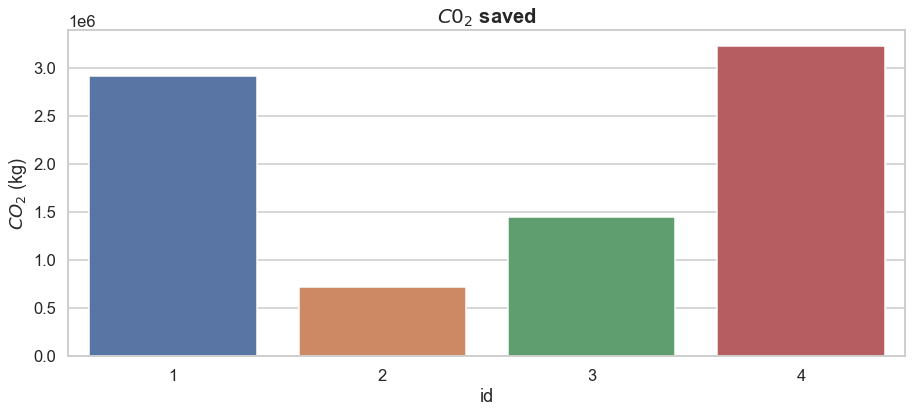

In [161]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("talk")
ax = sns.barplot(x="id", y="co2", data=df)
ax.set_title('$C0_2$ saved',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax.set_ylabel('$CO_2$ (kg)')

Text(0.5, 1.0, '% of $CO_2$ saved')

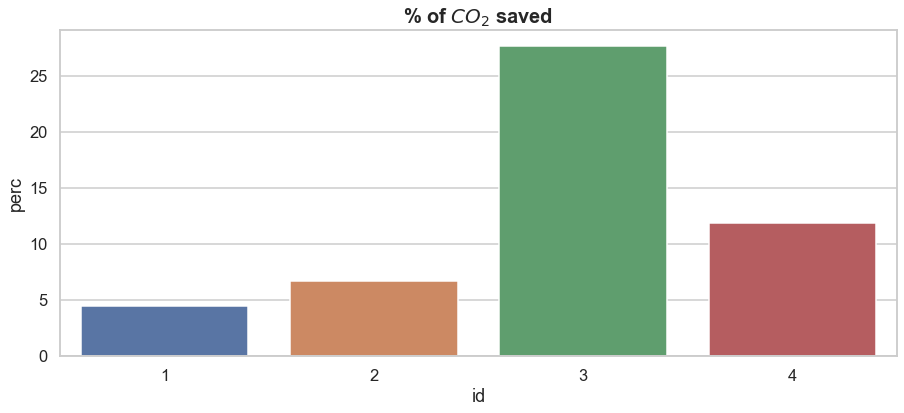

In [162]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="id", y="perc", data=df)
ax.set_title('% of $CO_2$ saved',fontdict= { 'fontsize': 20, 'fontweight':'bold'})

In [163]:
df=pd.read_csv('savedEnergy.csv')
df=df.drop(columns=['Unnamed: 0'])
df

id         kind        energy
0   1  consumption  2.515883e+08
1   1   production  1.469797e+07
2   2  consumption  4.204047e+07
3   2   production  3.644346e+06
4   3  consumption  2.037739e+07
5   3   production  7.309705e+06
6   4  consumption  1.058302e+08
7   4   production  1.631276e+07

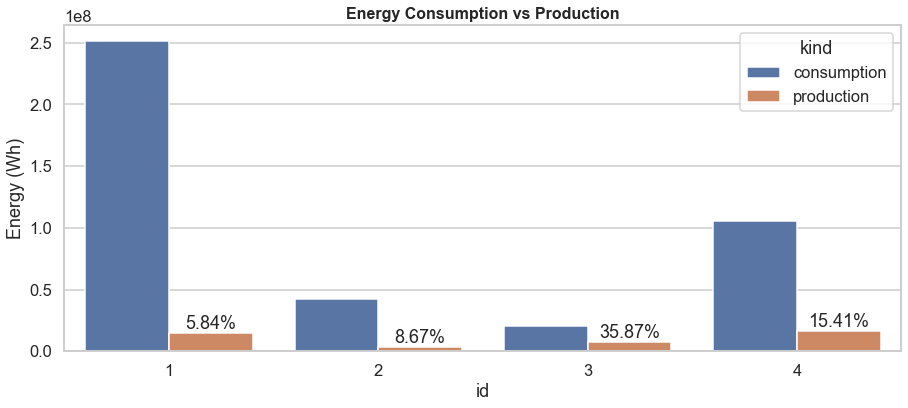

In [166]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="id", y="energy",hue="kind",data=df)
ax.set_title('Energy Consumption vs Production',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
ax.set_ylabel('Energy (Wh)')
c=0
for p in ax.patches[len(ax.patches)//2:]:
    ax.annotate(format(100*p.get_height()/ax.patches[c].get_height(), '.2f')+'%', 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    c+=1